# Air Quality

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Load Dataset

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Exploratory Data Analysis (EDA)

In [3]:
# See dataset detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

### Drop unnecessary Column

In [4]:
df.drop(columns=['Date','Time','RH','AH'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 804.2 KB


### Check duplicates

In [5]:
# Check duplicates
count_duplicates = df.duplicated().sum()
count_duplicates

31

## Feature scaling

In [6]:
# Using Scikit-learn library
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df)

# Convert Array to DF
df = pd.DataFrame(scaled_array, columns=df.columns)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.579952,0.635966,0.538977,0.873262
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.541041,0.591176,0.430539,0.872036
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.581805,0.589748,0.467909,0.866312
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.596628,0.599580,0.515380,0.862633
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.585510,0.568067,0.481131,0.863246


## Train-Test Split

In [7]:
# Splitting train and test
# Train = 80%
# Test = 20%
from sklearn.model_selection import train_test_split

y = df['T']
x = df.drop(columns='T')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7485, 10)
(7485,)
(1872, 10)
(1872,)


## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

# Print the learned coefficients
print("Learned coefficients (weights):", model.coef_)
print("Learned intercept (bias):", model.intercept_)

# Make predictions (using Train Set)
y_pred_train = model.predict(x_train)
# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train MSE):", train_mse)

Learned coefficients (weights): [-7.03413050e-06 -1.55822376e-01 -5.48022220e-02  1.30121158e+00
 -2.07613133e-01 -1.00402477e-01 -1.17937443e-01  5.18756735e-02
  2.45384093e-01 -1.22784169e-01]
Learned intercept (bias): 0.0038677125623551856
Mean Squared Error (Train MSE): 0.0005667014118693809


In [9]:
# Make predictions (using Test Set)
y_pred_test = model.predict(x_test)
# Calculate Mean Squared Error
test_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test MSE):", test_mse)

Mean Squared Error (Test MSE): 0.0005589113926689007


## Manual LR Code

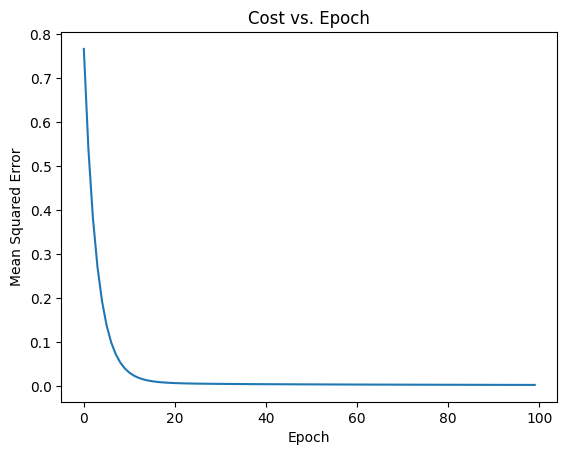

Mean Squared Error (Test MSE): 0.0024706495330633835
Mean Squared Error (Train MSE): 0.002443100799307576


In [ ]:
# Manual LR code by Ihsanul

def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_predictions(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_gradients(X, y, y_pred):
    n_samples = X.shape[0]
    dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
    db = (1/n_samples) * np.sum(y_pred - y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train(X, y, learning_rate, epoch):
    n_samples, n_features = X.shape
    weights, bias = initialize_parameters(n_features)
    costs = []  # Store MSE values at each epoch

    for i in range(epoch):
        y_pred = compute_predictions(X, weights, bias)
        dw, db = compute_gradients(X, y, y_pred)
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

        # Calculate MSE and append to costs
        cost = MSE(y, y_pred)
        costs.append(cost)

    return weights, bias, costs

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


# Train the model
weights, bias, costs = train(x_train, y_train, learning_rate=0.5, epoch=100)

# Plot
plt.plot(range(len(costs)), costs)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs. Epoch')
plt.show()

# Make predictions (using Test Set)
y_pred_test = predict(x_test, weights, bias)
# Calculate Mean Squared Error
test_mse = MSE(y_test, y_pred_test)
print("Mean Squared Error (Test MSE):", test_mse)

# Make predictions (using Train Set)
y_pred_train = predict(x_train, weights, bias)
# Calculate Mean Squared Error
train_mse = MSE(y_train, y_pred_train)
print("Mean Squared Error (Train MSE):", train_mse)